DATASET --> https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019/data

## IMPORTS

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

## CSV

In [2]:
# Carga del csv
trackData = pd.read_csv("dataset/tracks.csv")

In [3]:
trackData.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
trackData.shape

(586672, 20)

## 1 --> LIMPIEZA

In [5]:
# Porcentaje de nulos
trackData.isnull().sum()/ len(trackData) * 100

id                  0.000000
name                0.012102
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
artists             0.000000
id_artists          0.000000
release_date        0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.000000
dtype: float64

In [6]:
# Total de nulos --> name
trackData["name"].isnull().sum()

71

In [7]:
trackData[trackData["name"].isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [8]:
# Nos quedamos solo con los que no son null en el dataset
trackData = trackData[trackData["name"].notnull()]

In [9]:
# Eliminamos caracteres caracteres raros
trackData.loc[:, "artists"] = trackData["artists"].str.replace(r"[\[\]]", "", regex=True)
trackData.loc[:, "artists"] = trackData["artists"].str.replace("'", "", regex=False)

In [10]:
trackData.loc[:, "id_artists"] = trackData["id_artists"].str.replace(r"[\[\]]", "", regex=True)
trackData.loc[:, "id_artists"] = trackData["id_artists"].str.replace("'", "", regex=False)

In [11]:
# Pasamos a minuscula
trackData["name"] = trackData["name"].str.lower()
trackData["artists"] = trackData["artists"].str.lower()

In [12]:
# Filtrar filas con caracteres no ASCII en 'name'
pattern = r'[^\x00-\x7F]'
filtrados = trackData[trackData['name'].str.contains(pattern, regex=True)]
valores_unicos = filtrados['name'].unique()

print(valores_unicos)
len(valores_unicos)

['capítulo 2.16 - banquero anarquista' 'martín fierro - remasterizado'
 'capítulo 2.8 - banquero anarquista' ... '四季予你 - dj版'
 '同行 (新加坡電視劇《愛...沒有距離》主題曲)' '云与海']


112020

In [13]:
# Renombramos name
cols = ["name"]
for col in cols:
    trackData.loc[:, col] = trackData[col].astype(str)\
        .str.replace("á", "a")\
        .str.replace("é", "e")\
        .str.replace("í", "i")\
        .str.replace("ó", "o")\
        .str.replace("ú", "u")\
        .str.replace("â", "a")\
        .str.replace("ł", "l")\
        .str.replace("ñ", "n")\
        .str.replace("ś", "s")\
        .str.replace("ę", "e")\
        .str.replace("ê", "e")\
        .str.replace("ş", "s")

In [14]:
# Nos quedamos solo con name con carcateres no ASCII en el dataset
trackData=trackData[~trackData['name'].str.contains(pattern, regex=True)]

In [15]:
# Filtrar filas con caracteres ASCII en 'artists'
pattern = r'[^\x00-\x7F]'
filtrados = trackData[trackData['artists'].str.contains(pattern, regex=True, na=False)]
valores_unicos = filtrados['artists'].unique()

print(valores_unicos)
len(valores_unicos)

['félix mayol' 'adolphe bérard' 'dréan' ...
 'alun armstrong, jenny galloway, les misérables - 10th anniversary cast'
 'philip quast, colm wilkinson, les misérables - 10th anniversary cast'
 'frédéric chopin, jon nakamatsu']


10540

In [16]:
# Renombramos artists
cols = ["artists"]
for col in cols:
    trackData.loc[:, col] = trackData[col].astype(str)\
        .str.replace("á", "a")\
        .str.replace("é", "e")\
        .str.replace("í", "i")\
        .str.replace("ó", "o")\
        .str.replace("ú", "u")\
        .str.replace("â", "a")\
        .str.replace("č", "C")\
        .str.replace("ö", "o")\
        .str.replace("ë", "e")\
        .str.replace("ä", "a")

In [17]:
# Nos quedamos solo con atists con carcateres ASCII en el dataset
trackData=trackData[~trackData['artists'].str.contains(pattern, regex=True)]

In [18]:
trackData.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,carve,6,126903,0,uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,capitulo 2.16 - banquero anarquista,0,98200,0,fernando pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,vivo para quererte - remasterizado,0,181640,0,ignacio corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,el prisionero - remasterizado,0,176907,0,ignacio corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,lady of the evening,0,163080,0,dick haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [19]:
trackData.shape

(465766, 20)

## 2 --> ANALISIS EXPLORATORIO

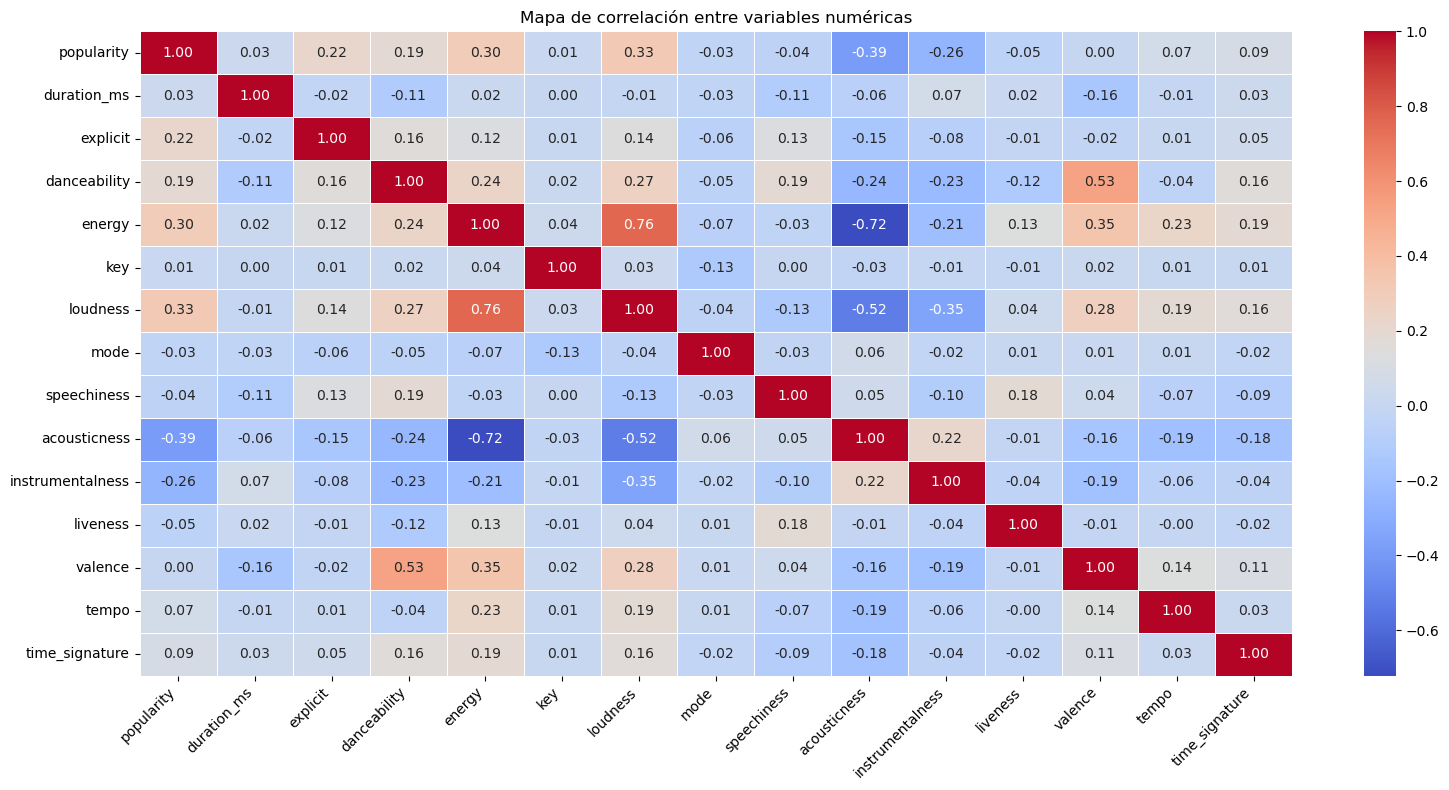

In [20]:
df_numerico = trackData.select_dtypes(include=["float64", "int64"])

matriz_correlacion = df_numerico.corr()

plt.figure(figsize=(16, 8)) 
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlación entre variables numéricas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
trackData.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,carve,6,126903,0,uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,capitulo 2.16 - banquero anarquista,0,98200,0,fernando pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,vivo para quererte - remasterizado,0,181640,0,ignacio corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,el prisionero - remasterizado,0,176907,0,ignacio corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,lady of the evening,0,163080,0,dick haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


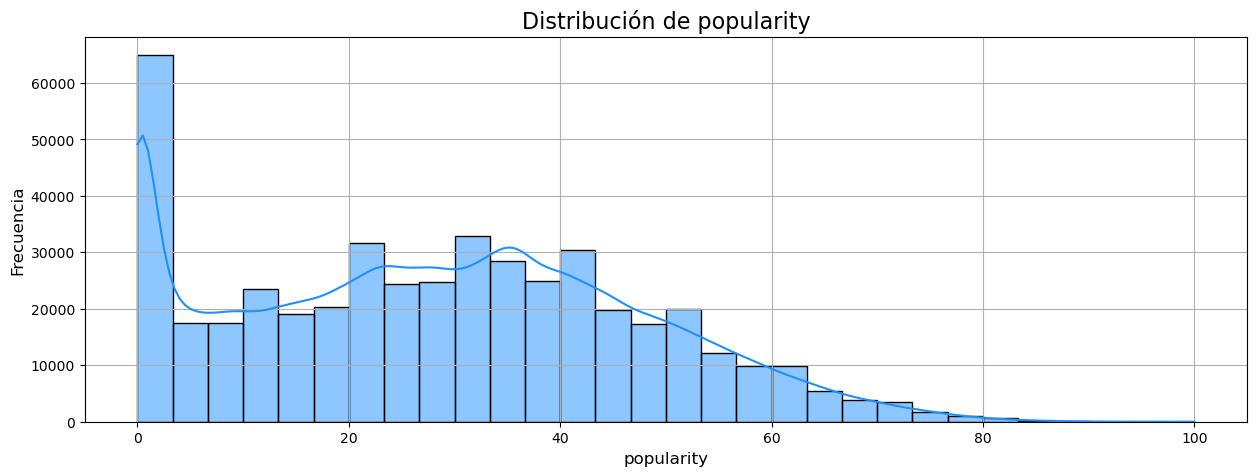

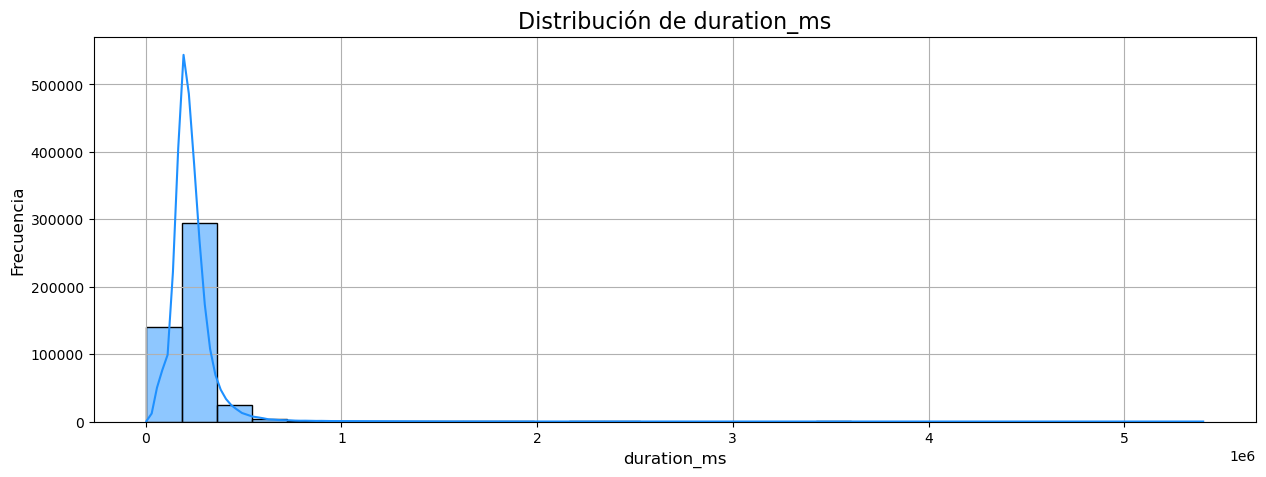

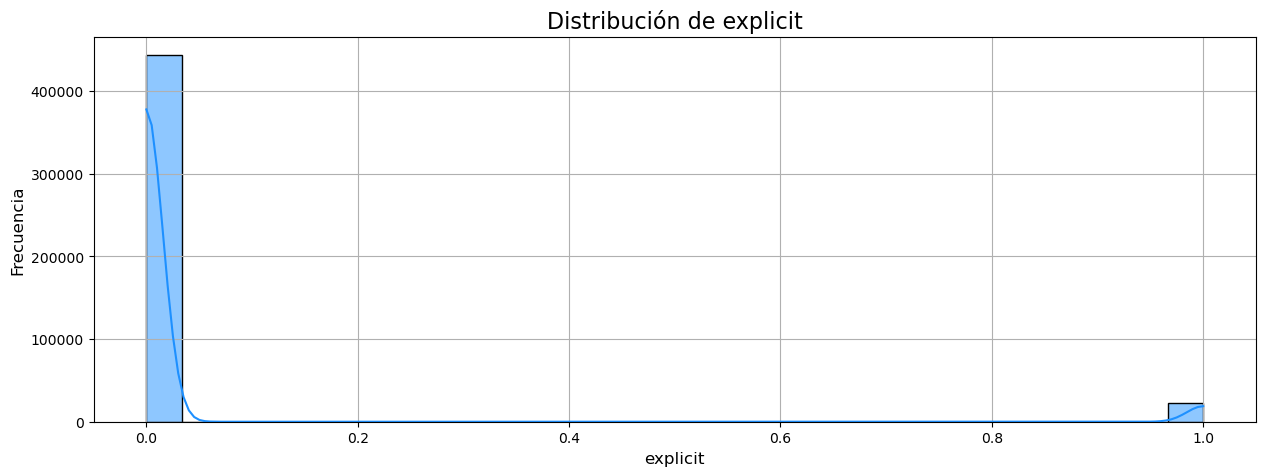

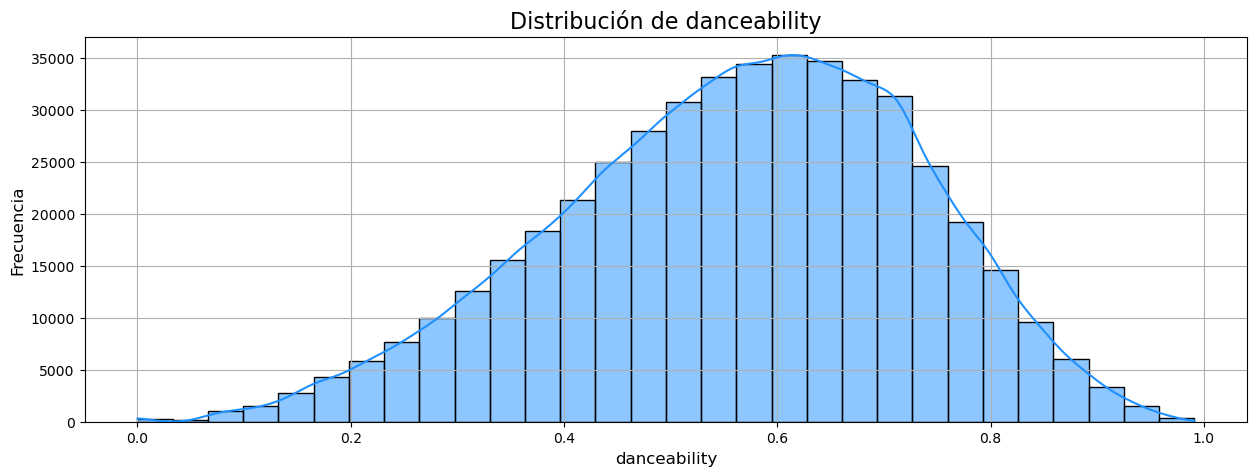

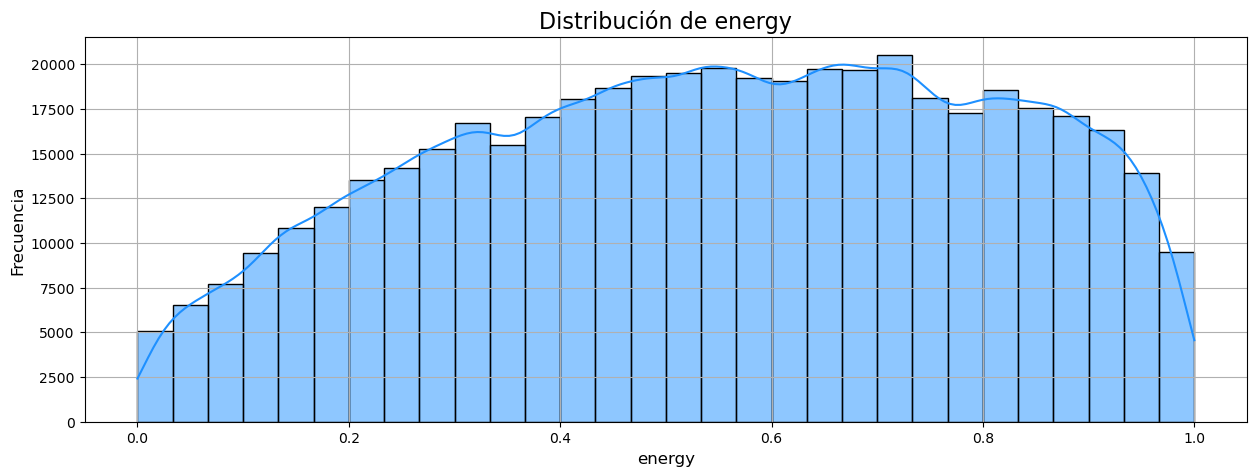

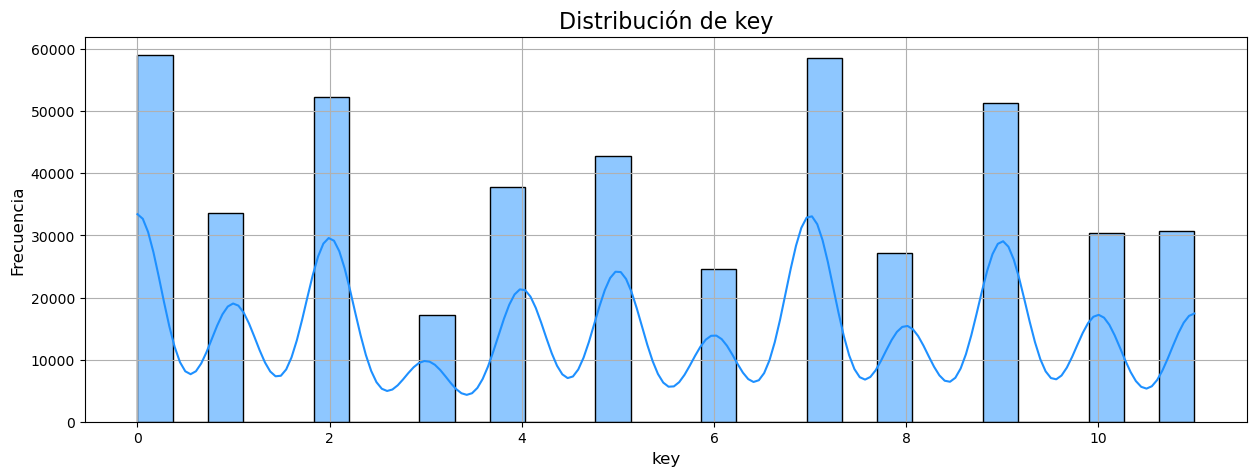

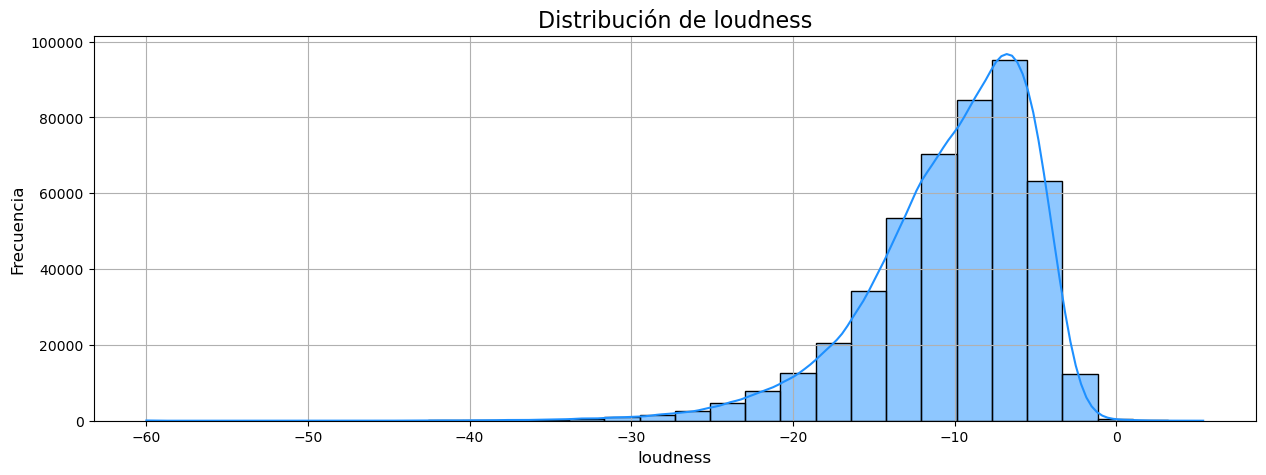

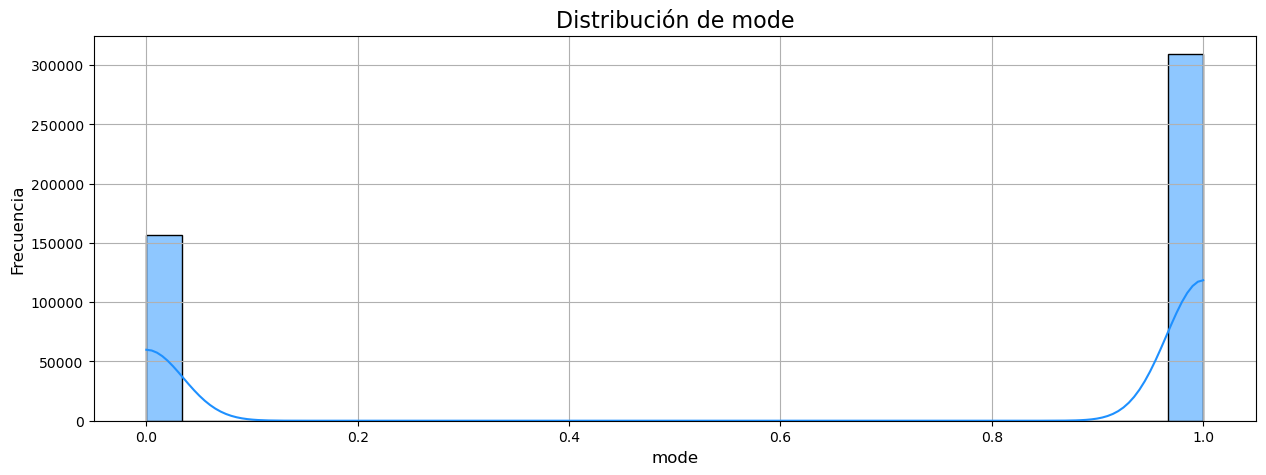

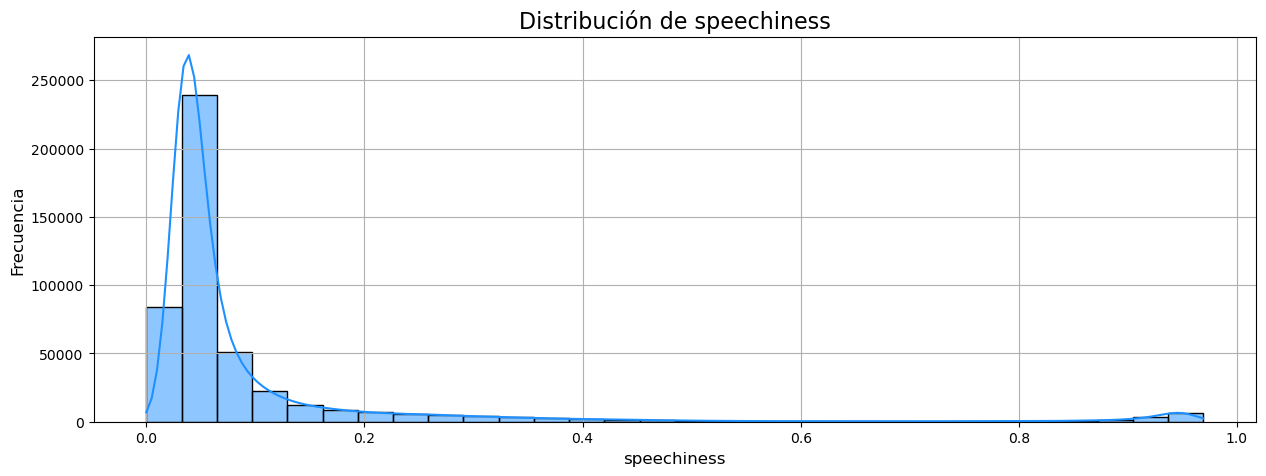

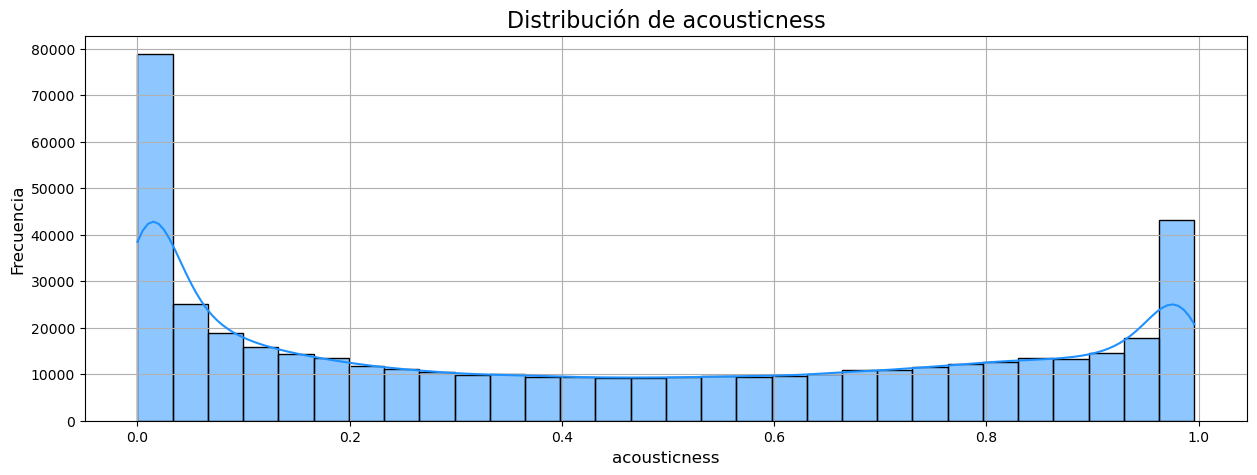

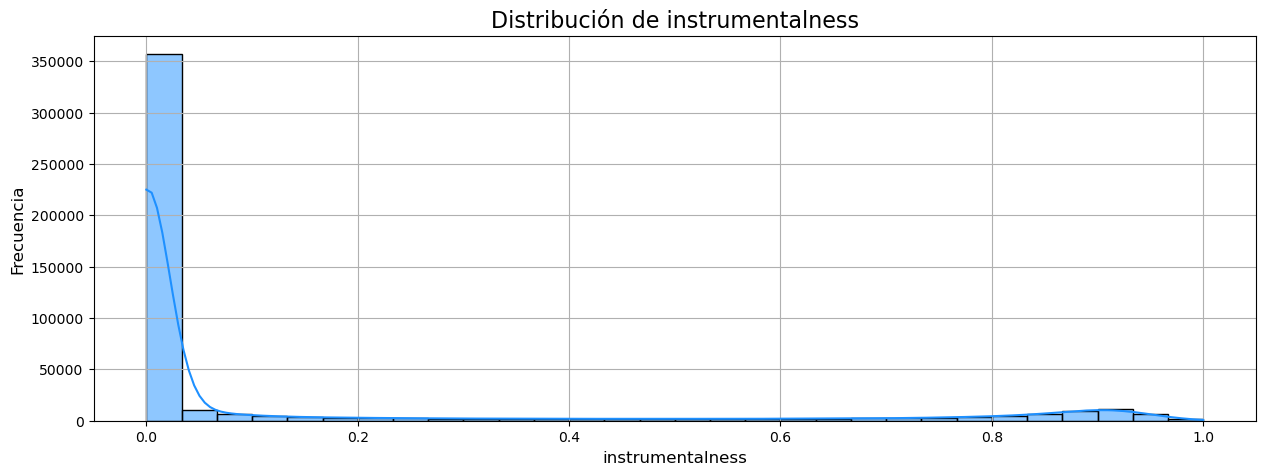

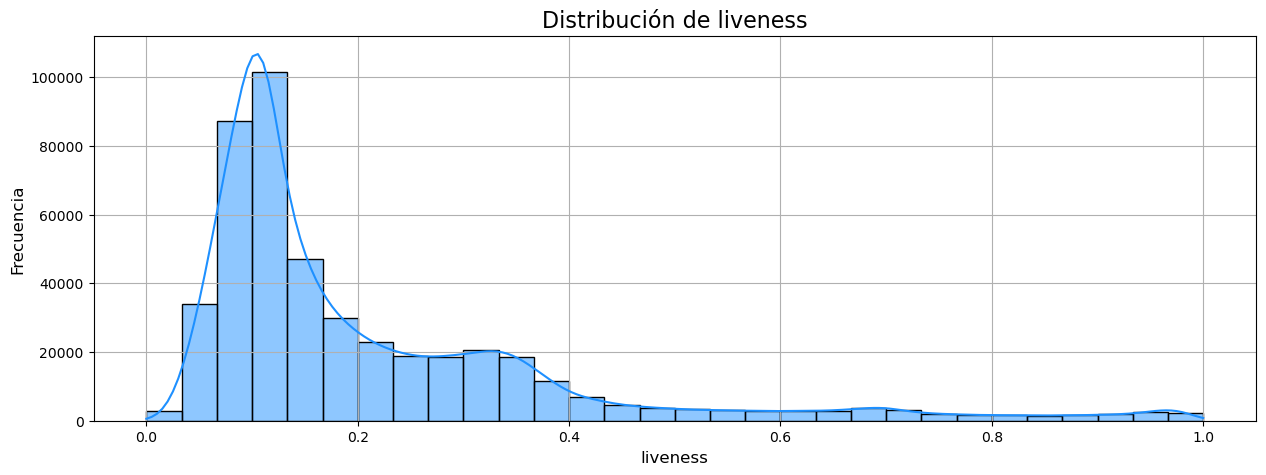

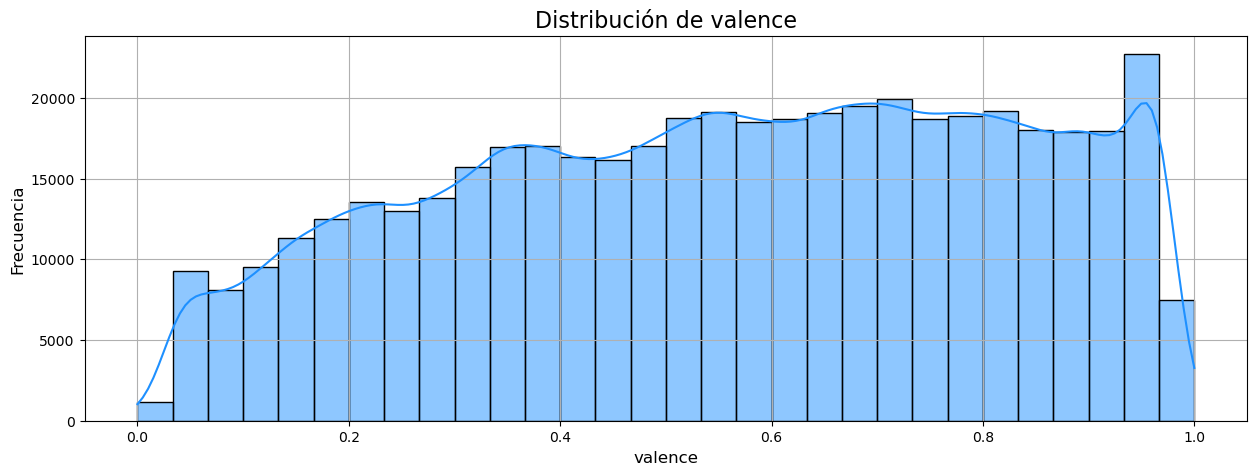

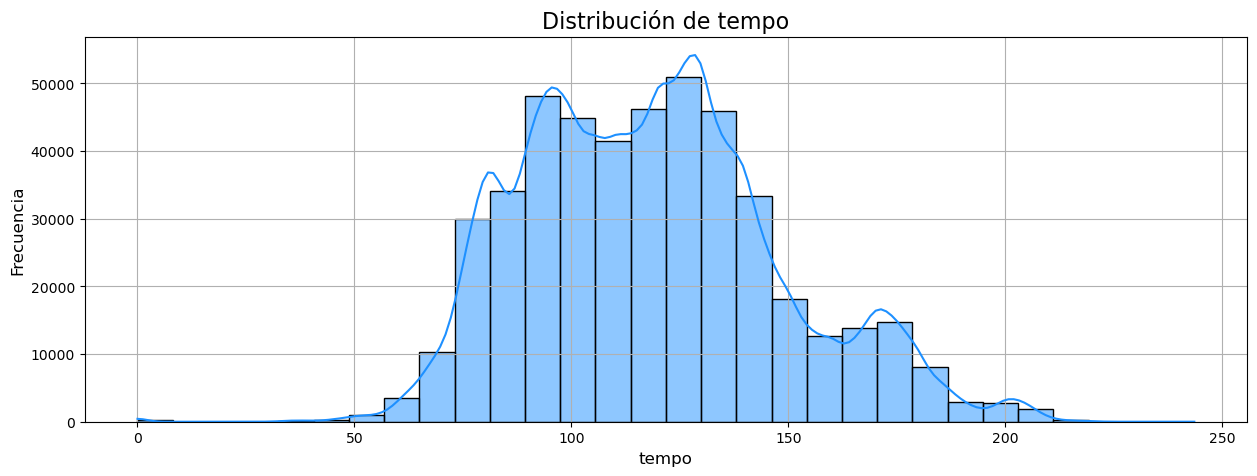

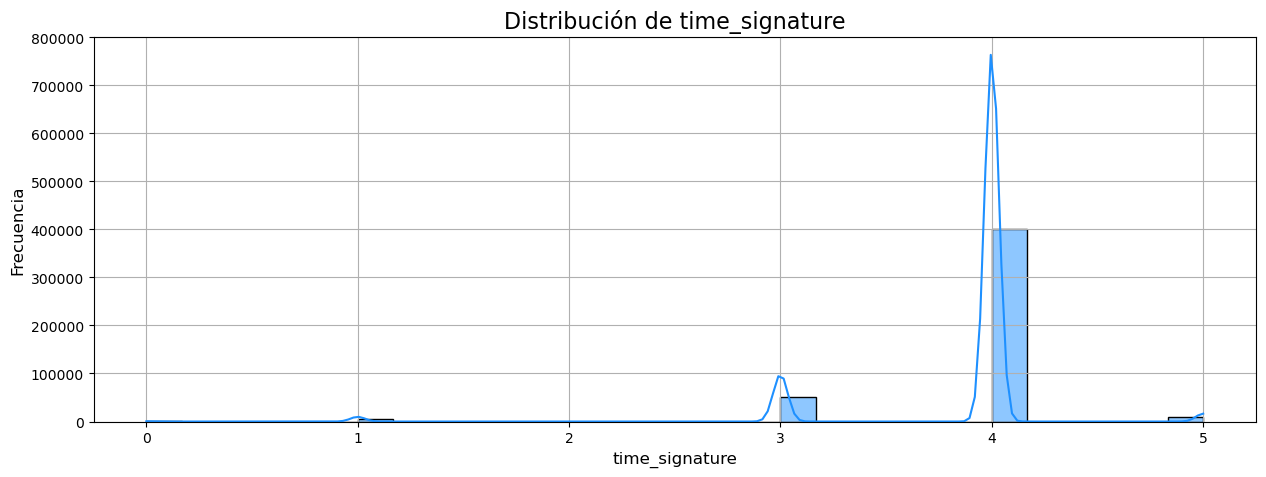

In [22]:
# Selecciona solo las columnas numéricas
columnas_numericas = trackData.select_dtypes(include=['float64', 'int64']).columns

# Genera un histograma por cada columna
for col in columnas_numericas:
    plt.figure(figsize=(15, 5))
    sns.histplot(trackData[col], kde=True, bins=30, color='dodgerblue')
    plt.title(f'Distribución de {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(True)
    plt.show()

## 3 --> KNN - NEIGHBORS

In [80]:
# Columnas numéricas con atributos para similitud
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'duration_ms'
]

# Datos preparados para trabajar con ellos
X = trackData[features]

In [81]:
# Entrenar modelo k-NN
knn = NearestNeighbors(n_neighbors=11, metric='euclidean')  # 10 recomendaciones + la canción misma
knn.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=11)

## 4 --> NEIGHBORS - NAME

In [74]:
trackData[trackData["name"] == "si estuviesemos juntos"]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
90977,35wvL50xvKpCHEJPxLOLPI,si estuviesemos juntos,81,169248,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.672,0.594,1,-6.813,0,0.0789,0.0626,0.000051,0.152,0.158,171.854,4


In [90]:
def recomendar_canciones_por_nombre(nombre_cancion, n_recomendaciones=10):
    # Buscar canciones que contengan el nombre
    indices = trackData[trackData['name'].str.lower().str.contains(nombre_cancion.lower())].index
    if len(indices) == 0:
        return f"❌ No se encontró ninguna canción que contenga '{nombre_cancion}'"
        
    # Usamos la primera coincidencia
    indice = indices[0]
    nombre = trackData.loc[indice, 'name']
    
    artistas_base = trackData.loc[indice, 'artists']
    if isinstance(artistas_base, str):
        artistas_base = [artistas_base]
    artistas_str = ', '.join(artistas_base)

    recomendaciones = recomendar_canciones_por_indice(indice, n_recomendaciones)

    # Construimos la salida bonita
    resultado = f"🎯 Recomendaciones basadas en: {nombre} - [{artistas_str}]\n\n🎵 Recomendaciones:\n"
    for i, fila in enumerate(recomendaciones.itertuples(), 1):
        nombre_reco = fila.name
        artistas_reco = fila.artists
        if isinstance(artistas_reco, str):
            artistas_reco = [artistas_reco]
        artistas_reco_str = ', '.join(artistas_reco)
        resultado += f"{i:2d}. {nombre_reco} - [{artistas_reco_str}]\n"
    
    return resultado

In [91]:
print(recomendar_canciones_por_nombre("si estuviesemos juntos"))

🎯 Recomendaciones basadas en: si estuviesemos juntos - [bad bunny]

🎵 Recomendaciones:
 1. carol - [the rolling stones]
 2. love in a void - [siouxsie and the banshees]
 3. pick up the tempo - [waylon jennings]
 4. buscando una estrella (look for a star) - [los tres reyes]
 5. rock my soul - remastered - [les humphries singers]
 6. ain't we got fun? (with paul weston & his orchestra & the norman luboff choir) - [doris day, paul weston and his orchestra, the norman luboff choir]
 7. kya khabar thi - [lata mangeshkar]
 8. whipping - remastered - [pearl jam]
 9. arrebol - [dominguinhos]
10. the bright lights and you girl - live - [tom jones]



## 5 --> NEIGHBORS - ARTIST

In [75]:
trackData[trackData["artists"] == "bad bunny"]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
89126,1JxhrUWZjuI8AOjDJ1JpMN,soy peor,74,257384,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2016-12-08,0.808,0.611,0,-3.221,0,0.0663,0.6830,0.006380,0.1140,0.1720,116.011,4
90977,35wvL50xvKpCHEJPxLOLPI,si estuviesemos juntos,81,169248,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.672,0.594,1,-6.813,0,0.0789,0.0626,0.000051,0.1520,0.1580,171.854,4
91167,4vCAzANUWDE24URV6wQ4ra,otra noche en miami,77,233128,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.514,0.646,1,-8.833,1,0.2750,0.1970,0.000023,0.0958,0.2970,88.661,4
91240,68QcquxCS39cQGTsRrJWIR,amorfoda,76,153887,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-02-15,0.749,0.418,9,-7.925,0,0.0587,0.9850,0.000126,0.0832,0.3070,147.887,3
91264,278kSqsZIiYp8p3QjYAqa8,ni bien ni mal,76,236216,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.826,0.449,5,-8.330,0,0.0674,0.5560,0.000018,0.2730,0.3370,128.028,4
91387,2OWVCFTolecLiGZPquvWvT,estamos bien,74,208080,0,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.759,0.536,9,-6.663,0,0.1730,0.8210,0.000005,0.1070,0.4390,119.883,4
91695,6it15CsDlkqB7N4lF0C1qM,caro,72,229456,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2018-12-23,0.651,0.575,0,-7.739,1,0.2990,0.6270,0.000202,0.0961,0.2480,160.007,4
92078,5DxXgozhkPLgrbKFY91w0c,vete,79,192024,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2019-11-21,0.886,0.672,1,-4.394,1,0.1880,0.0363,0.000009,0.1010,0.5260,91.976,4
92875,5RubKOuDoPn5Kj5TLVxSxY,te mudaste,88,130014,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2020-11-27,0.811,0.637,10,-4.835,0,0.0591,0.2340,0.000572,0.1180,0.4710,92.025,4
93013,26w9NTiE9NGjW1ZvIOd1So,booker t,84,156430,1,bad bunny,4q3ewBCX7sLwd24euuV69X,2020-11-27,0.883,0.600,7,-7.188,1,0.3700,0.1140,0.000008,0.0931,0.6910,113.903,4


In [102]:
def recomendar_por_artista(nombre_artista, n_recomendaciones=10):
    # Filtrar canciones del artista
    canciones_artista = trackData[trackData['artists'].apply(
        lambda x: any(nombre_artista.lower() in artista.lower() for artista in (x if isinstance(x, list) else [x]))
    )]
    
    if canciones_artista.empty:
        return f"❌ No se encontraron canciones para el artista '{nombre_artista}'"
    
    # Elegimos la primera canción del artista
    indice_cancion = canciones_artista.index[0]
    nombre_cancion_base = trackData.loc[indice_cancion, 'name']
    
    artistas_base = trackData.loc[indice_cancion, 'artists']
    if isinstance(artistas_base, str):
        artistas_base = [artistas_base]
    artistas_str = ', '.join(artistas_base)
    
    # Buscar vecinos más cercanos de esa canción en todo el dataset
    distancias, indices = knn.kneighbors(X.iloc[[indice_cancion]], n_neighbors=n_recomendaciones + 1)
    indices_recomendados = indices.flatten()[1:]  # Quitamos la canción misma
    recomendaciones = trackData.iloc[indices_recomendados][['name', 'artists']]
    
    # Formato bonito para mostrar
    resultado = f"🎯 Recomendaciones basadas en canciones de: {nombre_artista}\n"
    resultado += f"📀 Canción base: {nombre_cancion_base} - [{artistas_str}]\n\n🎵 Recomendaciones:\n"
    
    for i, fila in enumerate(recomendaciones.itertuples(), 1):
        nombre_reco = fila.name
        artistas_reco = fila.artists
        if isinstance(artistas_reco, str):
            artistas_reco = [artistas_reco]
        artistas_reco_str = ', '.join(artistas_reco)
        resultado += f"{i:2d}. {nombre_reco} - [{artistas_reco_str}]\n"
    
    return resultado

In [103]:
print(recomendar_por_artista("bad bunny"))

🎯 Recomendaciones basadas en canciones de: bad bunny
📀 Canción base: soy peor - [bad bunny]

🎵 Recomendaciones:
 1. when it's sleepy time down south - [teddi king]
 2. hey hey, my my - [battleme]
 3. the sound of music - [mary martin]
 4. 'tain't what you do (it's the way that you do it) - [fats waller]
 5. 'tain't what you do (it's the way that you do it) - [fats waller]
 6. i just love you - [sy melano, the magic strings]
 7. soy ladrillero - [los hermanos cuestas]
 8. a blues serenade - 78rpm version - [glenn miller & his orchestra; vocal by smith ballew]
 9. embraceable you - [mgm studio orchestra, johnny green]
10. gurbet - [cem karaca]

